<a href="https://colab.research.google.com/github/leonardo69-code/Python---Banco-de-Dados/blob/main/Analisando_graficos_tabelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd

In [45]:
# importando uma tabela a partir de um link da internet
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1q64TPaErzCYgXX6Exp1hopq_L2JnRT3j/export?format=csv&gid=1469769408')
display(df)

,Idade,Demissão,Viagem de negócios,Diárias recebidas,Departamento,Distância de Casa,Escolaridade,Área de Formação,Número de contratos de trabalho na empresa,ID Funcionário,...,Satisfação nas relações Não trabalho,Jornada padrão de trabalho,opção de remaunração variável em ações,Total de anos trabalhados,Qtde de treinamentos realizados no último ano,Equilíbrio vida trabalho,Total de anos trabalhados na empresa,Anos trabalhados na função atual,Anos desde a última promoção,Anos trabalhando com o atual gestor
0,41,Sim,Viaja raramente,1102,Vendas,1,2,Ciências Humanas,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,Não,Viaja frequentemente,279,Pesquisa e Desenvolvimento,8,1,Ciências Humanas,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Sim,Viaja raramente,1373,Pesquisa e Desenvolvimento,2,2,Outras,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Não,Viaja frequentemente,1392,Pesquisa e Desenvolvimento,3,4,Ciências Humanas,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,Não,Viaja raramente,591,Pesquisa e Desenvolvimento,2,1,Ciências Médicas,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,Viaja frequentemente,884,Pesquisa e Desenvolvimento,23,2,Ciências Médicas,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,Não,Viaja raramente,613,Pesquisa e Desenvolvimento,6,1,Ciências Médicas,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,Não,Viaja raramente,155,Pesquisa e Desenvolvimento,4,3,Ciências Humanas,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,Não,Viaja frequentemente,1023,Vendas,2,3,Ciências Médicas,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [46]:
print(df.columns)

Index(['Idade', 'Demissão', 'Viagem de negócios', 'Diárias recebidas',
       'Departamento', 'Distância de Casa', 'Escolaridade', 'Área de Formação',
       'Número de contratos de trabalho na empresa', 'ID Funcionário',
       'Nível de Satisfação com o ambiente de trabalho', 'Gênero',
       'Salário por hora', 'Nível de envolvimento com o trabalho',
       'Nível hierárquico', 'Cargo', 'Satisfação com o trabalho',
       'Estado civil', 'Renda mensal', 'Salário Mensal',
       'qtde de empresas que já trabalhou', 'Maior de idade', 'Faz hora extra',
       'percentual de aumento de salário', 'score de performance',
       'Satisfação nas relações Não trabalho', 'Jornada padrão de trabalho',
       'opção de remaunração variável em ações', 'Total de anos trabalhados',
       'Qtde de treinamentos realizados no último ano',
       'Equilíbrio vida trabalho', 'Total de anos trabalhados na empresa',
       'Anos trabalhados na função atual', 'Anos desde a última promoção',
       'Anos 

In [47]:
# Desvio padrão de idade, renda e distância de casa, separados por gênero
std_por_genero = df.groupby('Gênero')[['Idade', 'Renda mensal', 'Distância de Casa']].std()
print("Desvio padrão por gênero:")
print(std_por_genero)

Desvio padrão por gênero:
              Idade  Renda mensal  Distância de Casa
Gênero                                              
Feminino   9.266083   4695.608507           8.231515
Masculino  9.042329   4714.856577           8.027361


In [48]:
# Criando faixas etárias
df['faixa_etaria'] = pd.cut(df['Idade'], bins=[18, 25, 35, 45, 55, 65])

# Calculando estatísticas por faixa etária
estatisticas_por_faixa_etaria = df.groupby('faixa_etaria')[['Renda mensal', 'Total de anos trabalhados']].agg(['mean', 'std', 'min', 'max'])
print("Estatísticas por faixa etária:")
print(estatisticas_por_faixa_etaria)

Estatísticas por faixa etária:
              Renda mensal                            \
                      mean          std   min    max   
faixa_etaria                                           
(18, 25]       3074.069565  1204.170543  1009   8639   
(25, 35]       4895.633663  2756.084254  1052  17444   
(35, 45]       7104.444444  4733.878536  1702  19973   
(45, 55]      10927.960177  5846.731995  2075  19999   
(55, 65]       9197.680851  5878.554725  2066  19943   

             Total de anos trabalhados                     
                                  mean        std min max  
faixa_etaria                                               
(18, 25]                      3.347826   2.069170   0   7  
(25, 35]                      7.648515   3.743895   0  17  
(35, 45]                     12.771368   5.860720   1  26  
(45, 55]                     20.424779   8.816959   1  37  
(55, 65]                     20.595745  11.580830   2  40  


<ipython-input-48-5225d4e927eb>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatisticas_por_faixa_etaria = df.groupby('faixa_etaria')[['Renda mensal', 'Total de anos trabalhados']].agg(['mean', 'std', 'min', 'max'])


In [49]:
# Média e desvio padrão do salário mensal por gênero e estado civil
salario_genero_estado_civil = df.groupby(['Gênero', 'Estado civil'])['Salário Mensal'].agg(['mean', 'std'])
print("Média e desvio padrão do salário mensal por gênero e estado civil:")
print(salario_genero_estado_civil)

Média e desvio padrão do salário mensal por gênero e estado civil:
                                mean          std
Gênero    Estado civil                           
Feminino  Casado        14591.393382  7088.275372
          Divorciado    14279.709402  7261.466134
          Solteiro      15020.502513  7033.020299
Masculino Casado        13673.543641  7128.650397
          Divorciado    14327.009524  7091.089451
          Solteiro      14464.332103  7141.448025


In [50]:
# Desvio padrão do percentual de aumento de salário por faixa etária e gênero
aumento_por_idade_genero = df.groupby(['faixa_etaria', 'Gênero'])['percentual de aumento de salário'].std()
print("Desvio padrão do percentual de aumento de salário por faixa etária e gênero:")
print(aumento_por_idade_genero)

Desvio padrão do percentual de aumento de salário por faixa etária e gênero:
faixa_etaria  Gênero   
(18, 25]      Feminino     3.625893
              Masculino    4.016021
(25, 35]      Feminino     3.756119
              Masculino    3.625192
(35, 45]      Feminino     3.504819
              Masculino    3.614574
(45, 55]      Feminino     4.002663
              Masculino    3.467225
(55, 65]      Feminino     3.876670
              Masculino    4.059746
Name: percentual de aumento de salário, dtype: float64


<ipython-input-50-7c90b2a3879f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aumento_por_idade_genero = df.groupby(['faixa_etaria', 'Gênero'])['percentual de aumento de salário'].std()


In [51]:
# Estatísticas descritivas para funcionários que fazem ou não fazem hora extra
estatisticas_hora_extra = df.groupby('Faz hora extra')[['Idade', 'Renda mensal', 'Distância de Casa']].agg(['mean', 'std', 'min', 'max'])
print("Estatísticas descritivas por status de hora extra:")
print(estatisticas_hora_extra)

Estatísticas descritivas por status de hora extra:
                    Idade                   Renda mensal                     \
                     mean       std min max         mean          std   min   
Faz hora extra                                                                
Não             36.762808  8.975894  18  60  6484.926945  4722.875102  1051   
Sim             37.331731  9.526402  18  60  6548.548077  4675.293789  1009   

                      Distância de Casa                    
                  max              mean       std min max  
Faz hora extra                                             
Não             19999          9.062619  8.153086   1  29  
Sim             19859          9.521635  7.988818   1  29  


In [52]:
# Estatísticas descritivas gerais para todas as colunas numéricas
estatisticas_gerais = df.describe()
print("Estatísticas gerais:\n", estatisticas_gerais)

Estatísticas gerais:
              Idade  Diárias recebidas  Distância de Casa  Escolaridade  \
count  1470.000000        1470.000000        1470.000000   1470.000000   
mean     36.923810         802.485714           9.192517      2.912925   
std       9.135373         403.509100           8.106864      1.024165   
min      18.000000         102.000000           1.000000      1.000000   
25%      30.000000         465.000000           2.000000      2.000000   
50%      36.000000         802.000000           7.000000      3.000000   
75%      43.000000        1157.000000          14.000000      4.000000   
max      60.000000        1499.000000          29.000000      5.000000   

       Número de contratos de trabalho na empresa  ID Funcionário  \
count                                      1470.0     1470.000000   
mean                                          1.0     1024.865306   
std                                           0.0      602.024335   
min                                

In [53]:
# Média
media_idade = df['Idade'].mean()
media_salario = df['Salário Mensal'].mean()
print("Média da Idade:", media_idade)
print("Média do Salário:", media_salario)

# Desvio padrão
desvio_idade = df['Idade'].std()
desvio_salario = df['Salário Mensal'].std()
print("Desvio Padrão da Idade:", desvio_idade)
print("Desvio Padrão do Salário:", desvio_salario)

# Mediana
mediana_idade = df['Idade'].median()
mediana_salario = df['Salário Mensal'].median()
print("Mediana da Idade:", mediana_idade)
print("Mediana do Salário:", mediana_salario)

# Valor mínimo e máximo
min_idade = df['Idade'].min()
max_idade = df['Idade'].max()
print("Idade Mínima:", min_idade)
print("Idade Máxima:", max_idade)

Média da Idade: 36.923809523809524
Média do Salário: 14313.103401360544
Desvio Padrão da Idade: 9.135373489136734
Desvio Padrão do Salário: 7117.786044059973
Mediana da Idade: 36.0
Mediana do Salário: 14235.5
Idade Mínima: 18
Idade Máxima: 60


In [54]:
# Estatísticas de salário por gênero
salario_por_genero = df.groupby('Gênero')['Salário Mensal'].agg(['mean', 'std', 'min', 'max'])
print("Estatísticas de Salário por Gênero:\n", salario_por_genero)

Estatísticas de Salário por Gênero:
                    mean          std   min    max
Gênero                                           
Feminino   14674.600340  7097.551706  2094  26997
Masculino  14072.105442  7125.073278  2097  26999


In [55]:
# Criando faixas etárias
df['faixa_etaria'] = pd.cut(df['Idade'], bins=[18, 25, 35, 45, 55, 65])

# Estatísticas por faixa etária
estatisticas_por_faixa = df.groupby('faixa_etaria')[['Idade', 'Salário Mensal']].agg(['mean', 'std', 'min', 'max'])
print("Estatísticas por Faixa Etária:\n", estatisticas_por_faixa)

Estatísticas por Faixa Etária:
                   Idade                   Salário Mensal                     \
                   mean       std min max           mean          std   min   
faixa_etaria                                                                  
(18, 25]      22.713043  1.945599  19  25   14983.713043  7233.137208  2097   
(25, 35]      30.988449  2.799327  26  35   14307.325083  7107.035947  2122   
(35, 45]      39.959402  2.886960  36  45   13590.339744  7112.600826  2094   
(45, 55]      50.123894  2.936764  46  55   15294.305310  6883.769318  2125   
(55, 65]      57.744681  1.374742  56  60   15197.787234  7803.677826  2354   

                     
                max  
faixa_etaria         
(18, 25]      26999  
(25, 35]      26997  
(35, 45]      26914  
(45, 55]      26703  
(55, 65]      26236  


<ipython-input-55-e252efe7db6b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatisticas_por_faixa = df.groupby('faixa_etaria')[['Idade', 'Salário Mensal']].agg(['mean', 'std', 'min', 'max'])


In [56]:
# Estatísticas para quem faz ou não faz hora extra
estatisticas_hora_extra = df.groupby('Faz hora extra')[['Idade', 'Renda mensal', 'Distância de Casa']].agg(['mean', 'std', 'min', 'max'])
print("Estatísticas por Status de Hora Extra:\n", estatisticas_hora_extra)

Estatísticas por Status de Hora Extra:
                     Idade                   Renda mensal                     \
                     mean       std min max         mean          std   min   
Faz hora extra                                                                
Não             36.762808  8.975894  18  60  6484.926945  4722.875102  1051   
Sim             37.331731  9.526402  18  60  6548.548077  4675.293789  1009   

                      Distância de Casa                    
                  max              mean       std min max  
Faz hora extra                                             
Não             19999          9.062619  8.153086   1  29  
Sim             19859          9.521635  7.988818   1  29  


In [57]:
# Percentis para a Idade e Salário Mensal
percentis_idade = df['Idade'].quantile([0.1, 0.5, 0.9])
percentis_salario = df['Salário Mensal'].quantile([0.1, 0.5, 0.9])
print("Percentis da Idade:\n", percentis_idade)
print("Percentis do Salário Mensal:\n", percentis_salario)

Percentis da Idade:
 0.1    26.0
0.5    36.0
0.9    50.0
Name: Idade, dtype: float64
Percentis do Salário Mensal:
 0.1     4603.0
0.5    14235.5
0.9    24001.7
Name: Salário Mensal, dtype: float64


In [59]:
# Média de variáveis importantes agrupadas pelo status de demissão
media_por_demissao = df.groupby('Demissão')[['Idade', 'Total de anos trabalhados',
                                             'Distância de Casa', 'Renda mensal',
                                             'Salário Mensal']].corr()
display(media_por_demissao)

Idade  Total de anos trabalhados  \
Demissão                                                                  
Não      Idade                      1.000000                   0.672753   
         Total de anos trabalhados  0.672753                   1.000000   
         Distância de Casa          0.005828                   0.020947   
         Renda mensal               0.486713                   0.771638   
         Salário Mensal             0.052284                   0.041819   
Sim      Idade                      1.000000                   0.672621   
         Total de anos trabalhados  0.672621                   1.000000   
         Distância de Casa          0.033881                   0.004146   
         Renda mensal               0.500602                   0.742277   
         Salário Mensal            -0.070142                  -0.039143   

                                    Distância de Casa  Renda mensal  \
Demissão                                                              
Não      Idade                               0.005828      0.486713   
         Total de anos trabalhados           0.020947      0.771638   
         Distância de Casa                   1.000000     -0.011321   
         Renda mensal                       -0.011321      1.000000   
         Salário Mensal                      0.028762      0.032067   
Sim      Idade                               0.033881      0.500602   
         Total de anos trabalhados           0.004146      0.742277   
         Distância de Casa                   1.000000      0.038948   
         Renda mensal                        0.038948      1.000000   
         Salário Mensal                      0.014747      0.077707   

                                    Salário Mensal  
Demissão                                            
Não      Idade                            0.052284  
         Total de anos trabalhados        0.041819  
         Distância de Casa                0.028762  
         Renda mensal                     0.032067  
         Salário Mensal                   1.000000  
Sim      Idade                           -0.070142  
         Total de anos trabalhados       -0.039143  
         Distância de Casa                0.014747  
         Renda mensal                     0.077707  
         Salário Mensal                   1.000000

In [60]:
# Média de variáveis importantes agrupadas pelo status de demissão
media_por_demissao = df.groupby('Demissão')[['Idade', 'Total de anos trabalhados',
                                             'Distância de Casa', 'Renda mensal',
                                             'Salário Mensal']].mean()
display(media_por_demissao)

,Idade,Total de anos trabalhados,Distância de Casa,Renda mensal,Salário Mensal
Demissão,,,,,
Não,37.561233,11.862936,8.915653,6832.739659,14265.779400
Sim,33.607595,8.244726,10.632911,4787.092827,14559.308017


In [61]:
# Criando uma faixa etária
df['faixa_etaria'] = pd.cut(df['Idade'], bins=[18, 25, 35, 45, 55, 65])

# Frequência de demissão por faixa etária
frequencia_faixa_etaria = pd.crosstab(df['faixa_etaria'], df['Demissão'])
print(frequencia_faixa_etaria)

# Criando uma faixa de distância
df['faixa_distancia'] = pd.cut(df['Distância de Casa'], bins=[0, 10, 20, 30, 40, 50])

# Frequência de demissão por faixa de distância
frequencia_faixa_distancia = pd.crosstab(df['faixa_distancia'], df['Demissão'])
print(frequencia_faixa_distancia)

Demissão      Não  Sim
faixa_etaria          
(18, 25]       75   40
(25, 35]      490  116
(35, 45]      425   43
(45, 55]      200   26
(55, 65]       39    8
Demissão         Não  Sim
faixa_distancia          
(0, 10]          882  144
(10, 20]         192   48
(20, 30]         159   45


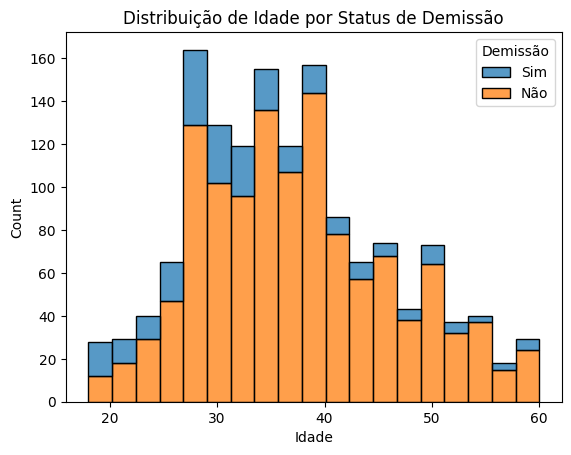

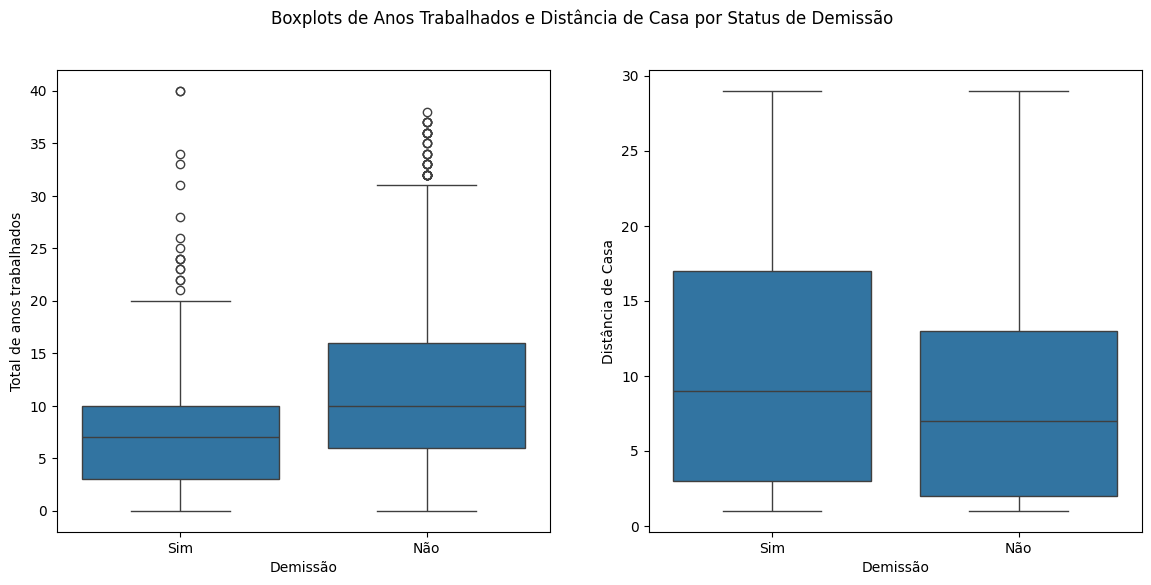

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da idade por status de demissão
sns.histplot(data=df, x='Idade', hue='Demissão', multiple='stack')
plt.title('Distribuição de Idade por Status de Demissão')
plt.show()

# Boxplots para anos trabalhados e distância de casa
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='Demissão', y='Total de anos trabalhados', ax=ax[0])
sns.boxplot(data=df, x='Demissão', y='Distância de Casa', ax=ax[1])
plt.suptitle('Boxplots de Anos Trabalhados e Distância de Casa por Status de Demissão')
plt.show()